# Project 4, APS1070 Fall 2022
#### **Linear Regression -  14 points**
**Deadline: Dec 1st, 21:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Your **name**: Anbumanivel Mohan Suganthi
*   Your **student number**: 1008696653



### How to submit **(HTML [This notebook] + IPYNB + GitHub [Part 7])**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files for this notebook on Quercus for grading.

7. Make sure you compeleted the last part on <font color='red'>**GitHub**</font> and added your link to the last cell here. The teaching team will view and grade your part 7 on GitHub.



Ref: https://stackoverflow.com/a/64487858 



## Part 1 - Getting Started [1 marks]

Ailerons are small hinged sections on the outboard portion of a wing used to control the roll of an airplane. In this project, we are going to design a controller to manage the ailerons of an aircraft based on supervised learning.

![Aileron](https://www.eecg.utoronto.ca/~hadizade/APS1070/p3Ar.jpg)




The following dataset contains 13750 instances, where each instance is a set of 40 features describing the airplane's status. Our goal is to use these features to predict the `Goal` column, which is a command that our controller should issue. We will make our predictions by implementing linear regression.

In [2]:
import pandas as pd
import numpy as np

df=pd.read_csv("https://raw.githubusercontent.com/aps1070-2019/datasets/master/F16L.csv" , skipinitialspace=True)

Here are the steps to complete this portion:

1. Print the dataframe.
2. Prepare your dataset as follows: **[0.5]**
  *   Using `train_test_split` from Sklearn, split the dataset into training, validation, and test sets ($70\%$ training, $15\%$ validation, and $15\%$ test). When splitting, set `random_state=1`.
  *   Standardize the data using `StandardScaler` from sklearn. 
  *   Insert the first column of all $1$s in the training, validation, and test set.
 
3. Explain the difference between epoch and iteration in the Gradient descent algorithm (SGD/mini-batch)? **[0.5]**

In [3]:
df

,inputs ClimbRate,Sgz,P,Q,CurPitch,CurRoll,AbsRoll,DiffClb,DiffRollRate,DiffDiffClb,...,DiffSeTime8,DiffSeTime9,DiffSeTime10,DiffSeTime11,DiffSeTime12,DiffSeTime13,DiffSeTime14,Alpha,Se,Goal
0,-17,-6,-0.03,0.14,0.59,-0.5,-11,-9,0.015,-0.2,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.6,0.021,-0.0008
1,-791,15,-0.28,-0.34,1.11,0.9,-10,27,-0.002,4.7,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.4,0.013,-0.0009
2,-46,48,-0.42,0.07,0.57,0.6,-5,-8,-0.008,0.0,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.019,-0.0005
3,496,-5,-0.21,-0.04,0.03,-0.5,-7,6,-0.002,-0.1,...,0.0,0.000,0.0,0.001,0.0,0.001,0.0,0.5,0.017,-0.0005
4,-124,16,-0.02,0.05,0.61,-0.2,-9,-3,0.000,0.0,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.018,-0.0006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13745,-53,-13,-0.07,0.02,0.58,-2.3,-15,12,0.022,-0.8,...,0.0,0.000,0.0,0.000,0.0,-0.001,0.0,0.5,0.019,-0.0007
13746,1,4,-0.11,-0.07,0.47,0.8,-5,8,-0.003,-0.2,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.016,-0.0004
13747,425,-14,0.40,0.07,0.41,-2.1,-16,12,0.031,-0.7,...,0.0,0.001,0.0,0.000,0.0,0.001,0.0,0.9,0.032,-0.0015
13748,102,-10,-0.19,0.08,1.30,0.5,-10,-3,-0.003,-0.2,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,1.4,0.051,-0.0015


In [4]:
from sklearn.model_selection import train_test_split
#feature data
x=df.drop(columns='Goal')

#target data
y=df['Goal']

#splitting the data
X_train, X_val, X_test, y_train, y_val, y_test = 0, 0, 0, 0, 0, 0
X_train, X_val_test, y_train, y_val_test = train_test_split(x, y, test_size=0.30, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.50, random_state=1)
print("Training size:", X_train.shape, y_train.shape)
print("Validation size:", X_val.shape, y_val.shape)
print("Test size:", X_test.shape, y_test.shape)

Training size: (9625, 40) (9625,)
Validation size: (2062, 40) (2062,)
Test size: (2063, 40) (2063,)


In [5]:
# Standaradizing the data
from sklearn.preprocessing import StandardScaler
scal = StandardScaler()
X_train_std = scal.fit_transform(X_train)
X_val_std = scal.transform(X_val)
X_test_std = scal.transform(X_test)

In [6]:
# Inserting the first column
X_train_std_b = [1 for i in range(0, X_train_std.shape[0])]
X_val_std_b = [1 for i in range(0, X_val_std.shape[0])]
X_test_std_b = [1 for i in range(0, X_test_std.shape[0])]

column = df.columns.values
df_X_train_std = pd.DataFrame(X_train_std, columns= column[0:40])
df_X_val_std = pd.DataFrame(X_val_std, columns= column[0:40])
df_X_test_std = pd.DataFrame(X_test_std, columns= column[0:40])

df_X_train_std.insert(loc=0, column='b', value=X_train_std_b)
df_X_val_std.insert(loc=0, column='b', value=X_val_std_b)
df_X_test_std.insert(loc=0, column='b', value=X_test_std_b)
print("New Training shape:", df_X_train_std.shape)
print("New Validation shape:", df_X_train_std.shape)
print("New Testing shape:", df_X_train_std.shape)


New Training shape: (9625, 41)
New Validation shape: (9625, 41)
New Testing shape: (9625, 41)


In [7]:
df_X_train_std

,b,inputs ClimbRate,Sgz,P,Q,CurPitch,CurRoll,AbsRoll,DiffClb,DiffRollRate,...,DiffSeTime7,DiffSeTime8,DiffSeTime9,DiffSeTime10,DiffSeTime11,DiffSeTime12,DiffSeTime13,DiffSeTime14,Alpha,Se
0,1,-0.361085,-0.905784,-0.119488,-0.940131,-0.095678,0.859111,0.979557,0.668783,0.155395,...,0.157864,0.0,0.160883,0.00344,0.159051,0.012816,0.158532,0.011771,-0.628786,-0.721327
1,1,-0.994936,-1.369858,-1.799868,1.163469,1.079630,0.034484,-1.679894,-0.483242,0.381453,...,0.157864,0.0,0.160883,0.00344,-2.981186,0.012816,-4.747804,0.011771,0.392746,0.577952
2,1,-1.125547,0.177055,-0.613717,-0.098691,0.603154,-0.583985,0.254252,-0.963252,-0.899543,...,0.157864,0.0,0.160883,0.00344,0.159051,0.012816,0.158532,0.011771,-0.118020,-0.288234
3,1,1.482842,1.143876,0.803074,2.257341,-1.112161,0.034484,0.254252,-2.403282,-3.009417,...,0.157864,0.0,0.160883,0.00344,0.159051,0.012816,0.158532,0.011771,-0.118020,0.000495
4,1,1.014177,-0.751093,1.824481,-0.351123,-1.270987,-0.480907,0.254252,1.724805,1.210332,...,0.157864,0.0,0.160883,0.00344,0.159051,0.012816,1.793977,0.011771,-1.139552,-0.721327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9620,1,-0.080655,0.293074,-0.448974,-0.351123,-0.349799,-0.687064,0.254252,0.572781,0.004689,...,0.157864,0.0,0.160883,0.00344,0.159051,0.012816,0.158532,0.011771,-0.628786,-0.721327
9621,1,0.948872,-0.171000,-0.910255,0.658605,-0.000383,0.652954,0.979557,0.188772,-0.447427,...,0.157864,0.0,0.160883,0.00344,0.159051,0.012816,0.158532,0.011771,1.414277,1.299774
9622,1,0.107580,1.762642,1.593840,1.836621,0.094912,0.343719,-2.405199,-0.579244,-0.748837,...,0.157864,0.0,0.160883,0.00344,0.159051,0.012816,0.158532,0.011771,0.392746,0.433588
9623,1,1.494367,0.911839,-1.371536,-0.855987,-1.588637,0.652954,1.221325,1.340797,-0.070663,...,0.157864,0.0,0.160883,0.00344,0.159051,0.012816,0.158532,0.011771,-0.628786,-0.721327


**Answer 1.3:**  Epoch is the number of times the algorithm learns the entire dataset in the neural network. Iteration is the number of times the algorithms parameters(weights) are updated i.e., number of times an algorithm applied in a dataset. Therefore, 1 epoch is when we cover all the batches in a dataset.

For full-batch gradient descent, the dataset is considered as a single batch. Therefore, 1 iteration and 1 epoch.

For mini-batch gradient descent, the dataset is split into different batches based on batch size. If we have a dataset of 500 samples and the batch size is 100 then inorder to complete 1 epoch 4 iterations are required.

For stochastic gradient descent, each sample is considered as a batch i.e., batch size is 1.

## Part 2 - Linear Regression Using Direct Solution [1 marks]

Implement the direct solution of the linear regression problem on the training set. **[0.5]**

**Note:** You should use **``scipy.linalg.inv``** to perform the matrix inversion, as ``numpy.linalg.inv`` may cause numerical issues.

Report the root-mean-square error (RMSE) for both the training and validation sets. **[0.5]**

You may use `mean_squared_error` from Sklearn for computing the RMSE.

In [8]:
# Direct solution
from scipy import linalg
from sklearn.metrics import mean_squared_error
from math import sqrt, ceil
w = np.dot(linalg.inv(np.dot(df_X_train_std.T, df_X_train_std)), np.dot(df_X_train_std.T, y_train)).reshape(-1,1)
n, m = w.shape
w.shape

(41, 1)

In [9]:
# Prediction
y_Pred_train = np.dot(df_X_train_std, w)
y_Pred_val = np.dot(df_X_val_std, w)

def RMSE(x, y):
  ans = sqrt(mean_squared_error(x, y))
  return ans

# RMSE for training and validation sets
RMSE_train = RMSE(y_Pred_train, y_train)
RMSE_val = RMSE(y_Pred_val, y_val)
print("RMSE for training:", RMSE_train)
print("RMSE for validation:", RMSE_val)

RMSE for training: 0.00018564534678737173
RMSE for validation: 0.0001873459316493033


## Part 3 - Full Batch Gradient Descent [2 marks]

We will now implement a "full batch" gradient descent algorithm and record the training time for our model. Recall that the full batch gradient descent is,
 $$w_t = w_{t-1} - \alpha~g_t$$ where $\alpha$ is the learning rate and $g_t$ is your gradient, computed on the entire data. 

Here are the steps for this part:

* Implement gradient descent for linear regression using a fixed learning rate of $\alpha= 0.01$, and iterate until your model's **validation** RMSE converges. 

  We consider the gradient descent as having converged when RMSE on the validation set using gradient descent satisfies:

  $$ RMSE_\text{GD} \leq 1.001 \times RMSE_\text{Direct Solution}$$

  where $RMSE_\text{Direct Solution}$ is the RMSE on the validation set using the direct solution that you have calculated in the previous part. 

  We refer to the quantity $RMSE_\text{Direct Solution}\times 1.001$ as the convergence threshold (CT).

*  Record the training time (from the first iteration until convergence) using the `time.time()` function. Be sure to compute the gradients yourself! Take a look at the code provided in the tutorial. **[0.5]**

* Plot the training RMSE and the validation RMSE vs. epoch on the same figure.  **[0.5]**

* Comment on overfitting/underfitting by observing the training and validation RMSE **[1]**

**Hint**: Initialize your weights with small random numbers (<$0.001$)

In [10]:
import time
start_time = time.time() ## Records current time

## GD Script -- Sample code in tutorial! ##
lr = 0.01 # Learning Rate
w = (np.random.uniform(high=0.001, size=n)).reshape(1,-1) # Initial Weights
rmse_array_train = []
rmse_array_val = []
CT = 1.001 * RMSE_val
y_train_df = pd.DataFrame(y_train)
y_val_df = pd.DataFrame(y_val)
RMSE_val_GD = 2 * RMSE_val
while RMSE_val_GD > CT:
  y_Pred_train_GD = np.dot(df_X_train_std,w.T).reshape (-1,1)
  y_Pred_val_GD = np.dot(df_X_val_std,w.T).reshape (-1,1)
  RMSE_train_GD = RMSE(y_Pred_train_GD, y_train)
  RMSE_val_GD = RMSE(y_Pred_val_GD, y_val)
  rmse_array_train.append(RMSE_train_GD)
  rmse_array_val.append(RMSE_val_GD)
  gradient = (1/len(y_Pred_train_GD) * np.dot(df_X_train_std.T, y_Pred_train_GD - y_train_df)).reshape(1,-1)
  w = w - lr * gradient # Weight update

print("--- Total Training Time: %s (s) ---" % (time.time() - start_time))

--- Total Training Time: 17.778334617614746 (s) ---


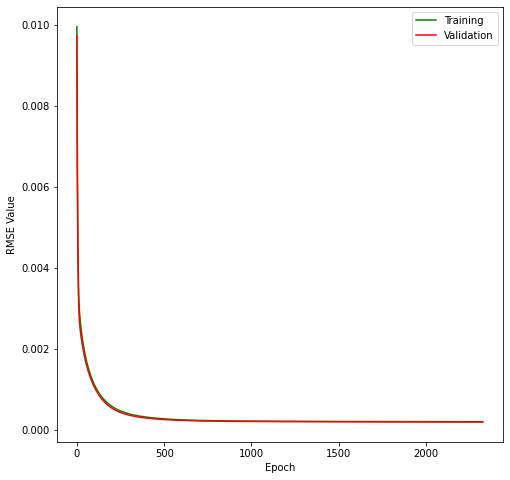

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.plot(rmse_array_train, label='Training', color='green', linestyle='solid')
plt.plot(rmse_array_val, label='Validation', color='Red', linestyle='solid')
plt.xlabel('Epoch') 
plt.ylabel('RMSE Value')
plt.legend()
plt.show()

**Answer 3.4:** Based on the above plot the model is neither underfit or overfit. Initially, the training RMSE is slightly higher than the validation RMSE for small number of epochs and when the epoch increases the RMSE for both training and validation seems to be identical and overlaps with eachother.Therefore, the model is a good fit.

## Part 4 - Mini-batch and Stochastic Gradient Descent [4 marks]

Write a function that performs mini-batch gradient descent until the convergence threshold (CT) is reached. **[1]**

The inputs of that function are: 
  * Input data (training/validation), Batch size, Learning Rate, Convergence Threshold (CT)

Your function will return the following arrays: 
 * The final weights after training.
 * The training RMSE at each epoch.
 * The validation RMSE at each epoch.
 * An array that has the elapsed time from the start of the training process to the end of each epoch (e.g., if each epoch takes exactly 2 seconds, the array would look like: [2 4 6 8 ...]).

Notes: 
* For certain batch sizes, GD might not converge to a solution. For that reason, you need to check the RMSE of the validation/training set at each epoch, and if it's getting larger and larger, you should stop the training for that case (the design is up to you!).
* CT will help you to know when your model is converged. 
* **Important: after each epoch, you need to shuffle the entire training set.** This ensures that new mini-batches are selected for every epoch. Hint: use `np.random.permutation`. 

Let's now use the function to investigate the effect of batch size on convergence. When the batch size is 1, we call that stochastic gradient descent. When the batch size equals the # of training data, it is full-batch (i.e., all data points are used at every iteration). Anywhere in between is mini-batch (we use some of the data).
  * Sweep different values for the mini-batch size (at least 5 values that **converge**), each time using a learning rate of $\alpha= 0.01$. **Hint: Try batch sizes that are powers of two (e.g., 2,4,8,16,32,64,128...).** These batch sizes fit better on the hardware and may achieve higher performance.  **[0.5]**

Provide the following $3$ plots:
  1.  Plot training and validation RMSE vs. **epoch** for all the **converging** batch sizes (some batch sizes might not converge) in a figure. The X-axis is Epoch # and the Y-axis is RMSE. **[0.5]**
  2. Plot training and validation RMSE vs. **time** for all the **converging** batch sizes in a figure. The X-axis is Time, and the Y-axis is RMSE. **[0.5]**
  3. Plot Total training time (y-axis) vs. Batch size (x-axis). **[0.5]**

Describe your findings, including the main takeaways from each of your plots. **[1]**

In [12]:
def mini_batch_GD(X_train, y_train, X_val, y_val, batch_size, lr, CT):
  start_time = time.time()
  RMSE_train_list = []
  RMSE_val_list = []
  time_list = []
  w = (np.random.uniform(high=0.001, size=41)).reshape(1,-1) # Initial Weights
  RMSE_val = 2 * CT
  total_num_of_batch = ceil(X_train.shape[0]/batch_size)
  while RMSE_val > CT:
    for i in range(0, total_num_of_batch):
      idx = i*batch_size
      if (X_train.shape[0] - idx) < batch_size:
        X_train_batch = X_train.iloc[idx: , :]
        y_train_batch = y_train.iloc[idx:]
      else:
        X_train_batch = X_train.iloc[idx:idx+batch_size, :]
        y_train_batch = y_train.iloc[idx:idx+batch_size]
      y_Pred_train_batch = np.dot(X_train_batch,w.T).reshape (-1,1)
      gradient = (1/len(y_Pred_train_batch) * np.dot(X_train_batch.T, y_Pred_train_batch - y_train_batch)).reshape(1,-1)
      w = w - lr * gradient # Weight update

    y_Pred_train = np.dot(X_train,w.T).reshape (-1,1)
    y_Pred_val = np.dot(X_val,w.T).reshape (-1,1)
    RMSE_train = RMSE(y_Pred_train, y_train)
    RMSE_val = RMSE(y_Pred_val, y_val)
    RMSE_train_list.append(RMSE_train)
    RMSE_val_list.append(RMSE_val)
    if len(RMSE_train_list)>=8:
      if all(i < j for i, j in zip(RMSE_train_list, RMSE_train_list[4:])) == 1:
        break
    if len(RMSE_val_list)>=8:
      if all(i < j for i, j in zip(RMSE_val_list, RMSE_val_list[4:])) == 1:
        break
    arr = np.random.permutation(X_train.shape[0])
    X_train = X_train.iloc[arr]
    y_train = y_train.iloc[arr]
    time_list.append(time.time() - start_time)
  return w, RMSE_train_list, RMSE_val_list, time_list

In [13]:
CT = 1.001*RMSE_val
lr = 0.01
w_dict = {}
RMSE_train_dict = {}
RMSE_val_dict = {}
time_dict = {}
batch_size = [1, 2, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]
for i in batch_size:
  w_dict[i], RMSE_train_dict[i], RMSE_val_dict[i], time_dict[i] = mini_batch_GD(df_X_train_std, y_train_df, df_X_val_std, y_val_df, i, lr, CT)

In [14]:
# Finding converging batch sizes
Converge_List = []
Non_Converge_List = []
for i in batch_size:
  if RMSE_val_dict[i][-1] < CT:
    Converge_List.append(i)
  else:
    Non_Converge_List.append(i)
print("Converged Batch Values:", Converge_List)
print("Non-Converged Batch Values:", Non_Converge_List)

Converged Batch Values: [64, 128, 256, 512, 1024, 2048]
Non-Converged Batch Values: [1, 2, 8, 16, 32]


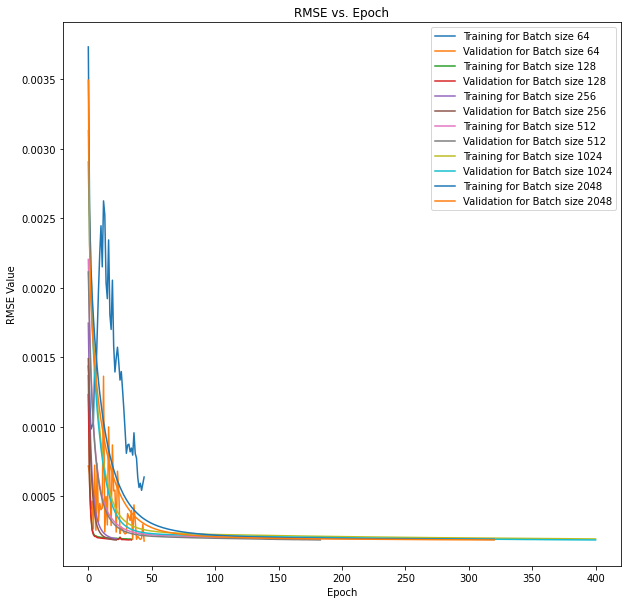

In [15]:
# Plot for training and validation RMSE vs. epoch
plt.figure(figsize=(10,10))
for i in Converge_List:
  plt.plot(RMSE_train_dict[i], label='Training for Batch size {}'.format(i), linestyle='solid')
  plt.plot(RMSE_val_dict[i], label='Validation for Batch size {}'.format(i), linestyle='solid') 
plt.xlabel('Epoch')
plt.ylabel('RMSE Value')
plt.title('RMSE vs. Epoch')
plt.legend()
plt.show()

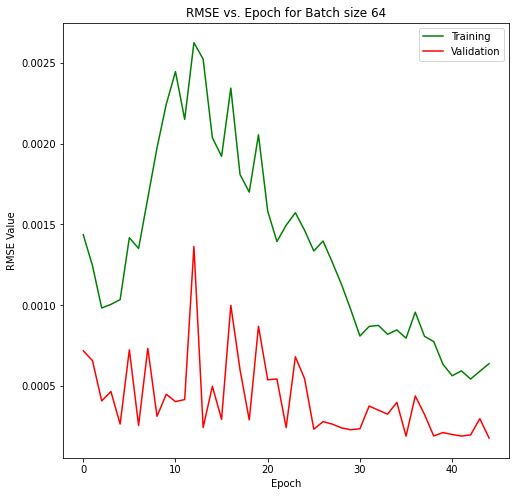

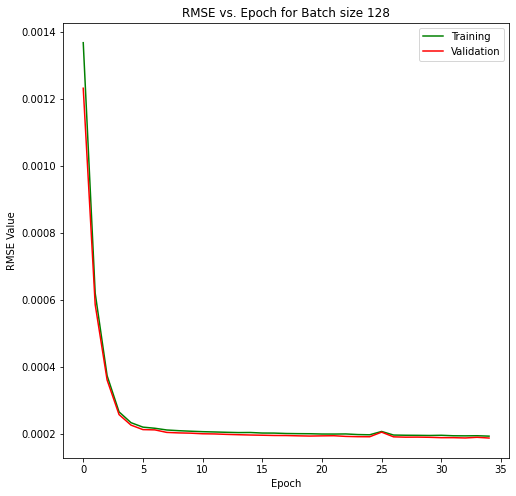

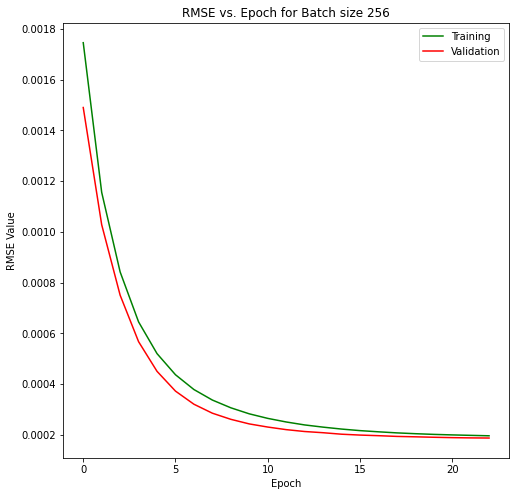

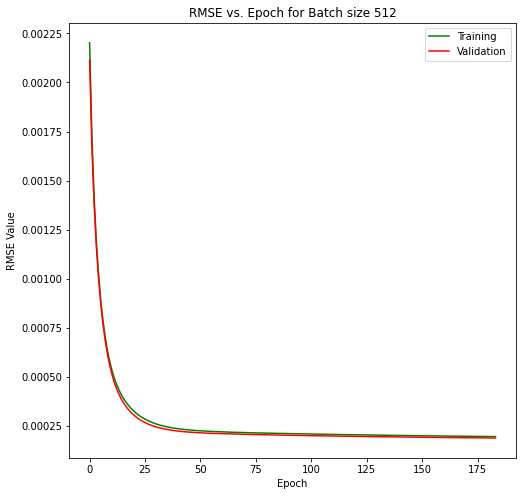

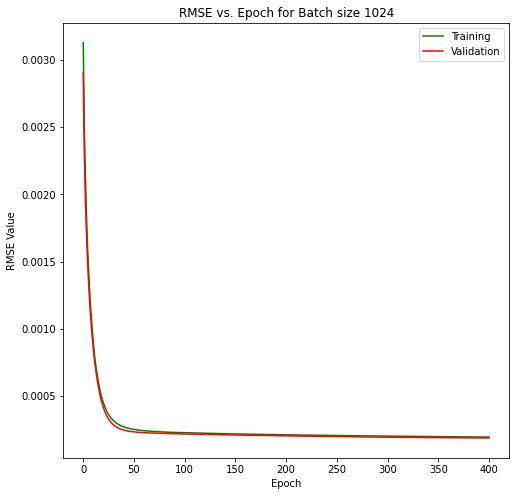

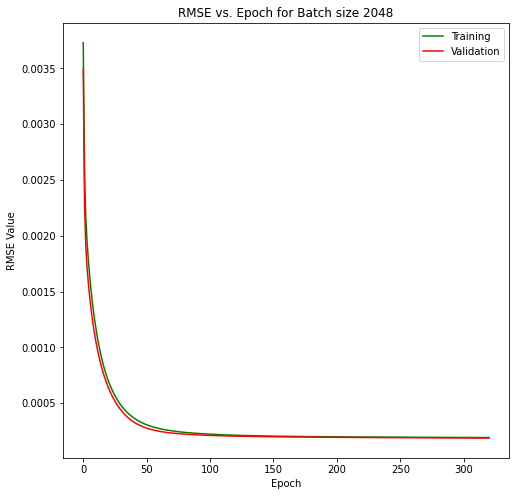

In [16]:
# Plot for training and validation RMSE vs. epoch in seperate figure for better understanding
for i in Converge_List:
  plt.figure(figsize=(8,8))
  plt.plot(RMSE_train_dict[i], label='Training', color='green', linestyle='solid')
  plt.plot(RMSE_val_dict[i], label='Validation', color='Red', linestyle='solid')
  plt.xlabel('Epoch') 
  plt.ylabel('RMSE Value')
  plt.title('RMSE vs. Epoch for Batch size {}'.format(i))
  plt.legend()
  plt.show()

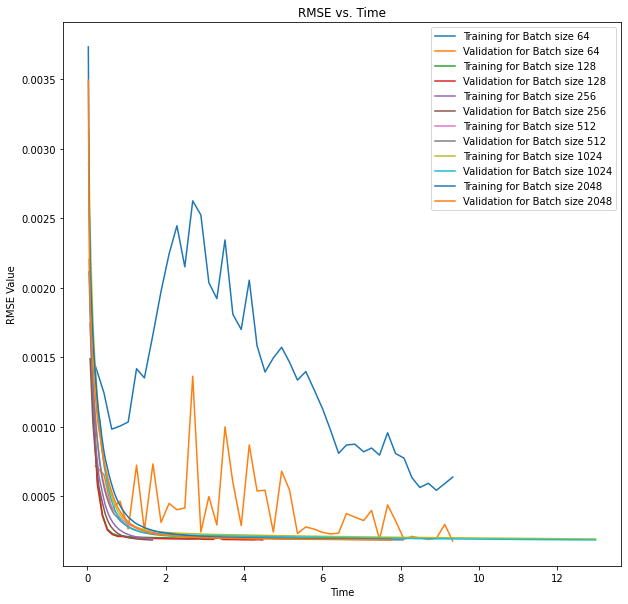

In [19]:
# Plot for training and validation RMSE vs. time
plt.figure(figsize=(10,10))
for i in Converge_List:
  plt.plot(time_dict[i], RMSE_train_dict[i], label='Training for Batch size {}'.format(i), linestyle='solid')
  plt.plot(time_dict[i], RMSE_val_dict[i], label='Validation for Batch size {}'.format(i), linestyle='solid')
plt.xlabel('Time') 
plt.ylabel('RMSE Value')
plt.title('RMSE vs. Time')
plt.legend()
plt.show()

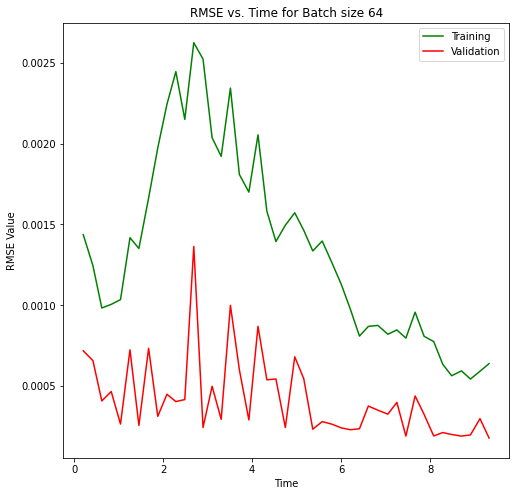

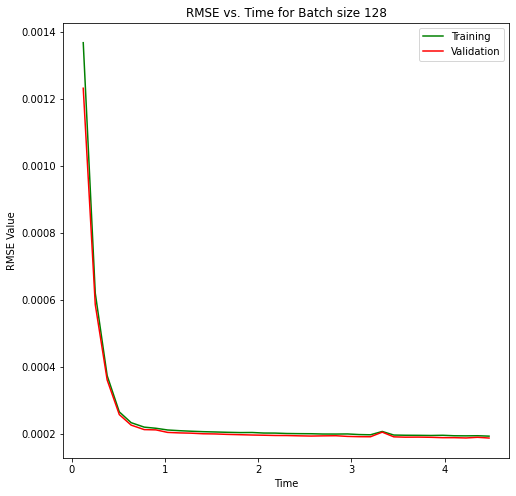

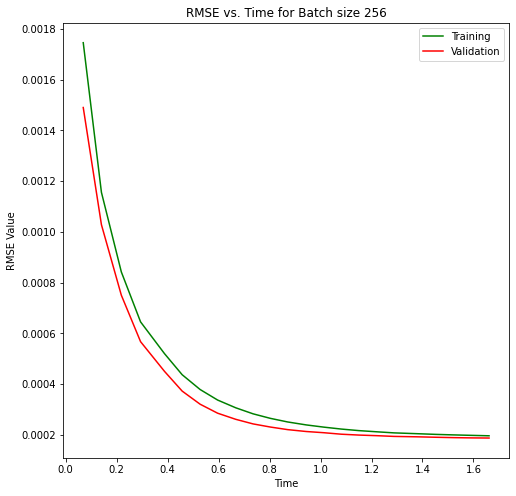

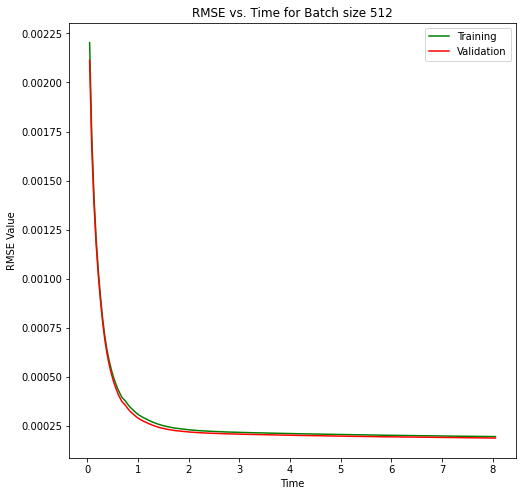

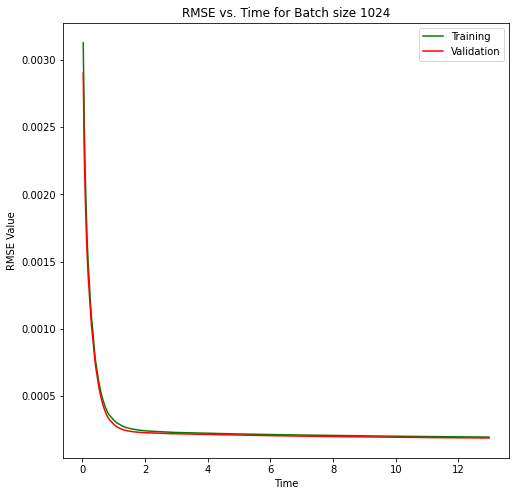

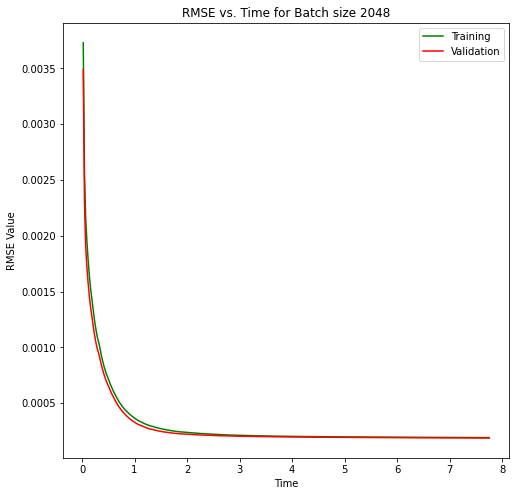

In [20]:
# Plot for training and validation RMSE vs. time in seperate figure for better understanding
for i in Converge_List:
  plt.figure(figsize=(8,8))
  plt.plot(time_dict[i], RMSE_train_dict[i], label='Training', color='green', linestyle='solid')
  plt.plot(time_dict[i], RMSE_val_dict[i], label='Validation', color='Red', linestyle='solid')
  plt.xlabel('Time') 
  plt.ylabel('RMSE Value')
  plt.title('RMSE vs. Time for Batch size {}'.format(i))
  plt.legend()
  plt.show()

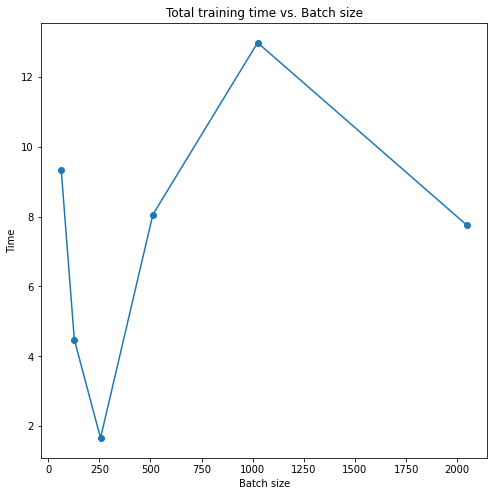

In [21]:
# Plot for Total training time vs. Batch size
time_converge = []
for i in Converge_List:
  time_converge.append(time_dict[i][-1])
plt.figure(figsize=(8,8))
plt.plot(Converge_List, time_converge, marker='o')
plt.xlabel('Batch size') 
plt.ylabel('Time')
plt.title('Total training time vs. Batch size')
plt.show()

In [22]:
# Finding Best validation RMSE 
arr = []
for i in Converge_List:
  a = min(RMSE_val_dict[i])
  arr.append(a)
  print(i, "-", min(RMSE_val_dict[i]))
print("Minimum RMSE Value:", Converge_List[arr.index(min(arr))],"-", min(arr))
print(Converge_List)

64 - 0.0001792051145968581
128 - 0.00018742305966993984
256 - 0.00018706592195546603
512 - 0.00018751571518689804
1024 - 0.00018735877474000662
2048 - 0.00018751060875882896
Minimum RMSE Value: 64 - 0.0001792051145968581
[64, 128, 256, 512, 1024, 2048]


**Answer 4.4:** The model converges for batch size 64, 128, 256, 512, 1024, 2048 and does not converge for batch size less than 64.

1). Based on RMSE vs. epoch plot for training and validation, for the converging batch sizes initially the RMSE for training is higher than the validation RMSE for small number of epochs and when the epoch increases both training and validation RMSE seems to be identical and overlaps with eachother. Hence, it is considered as a good fit. But for batch size 64 training and validation RMSE is not identical and has high variance.

2). Based on RMSE vs. time plot, the RMSE value decreases in increase in time for all the converging batch sizes. However, the graph is similar to RMSE vs. epoch.

3). Based on Total training time vs. Batch size, when the batch size is larger the number of epoch increases and it takes more time for converging. From the curve, it is seen that the time decreases for batch size 64 to 256 and then time increases till batch size 1024 and again decreases till batch size 2048. The batch size 256 takes less time to converge and batch size 64 has the minimum RMSE value for validation compared to all other batch sizes.

## Part 5 - Gradient Descent Learning Rate [2 marks]
Use the function that you designed in Part 4 to investigate the effect of learning rate on convergence.

1. Pick 3 batchsize that are not converging with a learning rate of $\alpha= 0.01$ (last part) and try to find a learning rate that results in convergence for each batchsize. Report your findings in a table. Mention batch size, learning rate, and training and validation RMSE. **[0.5]**

2. Select the best batchsize based on Part 4's fastest convergence time and sweep the learning rate (at least 10 values, all should converge) while applying Mini-batch GD. 
  
  * Plot the training and validation RMSE vs. **epoch** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Plot the training and validation RMSE vs. **time** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Describe your findings, including the main takeaways from each of your plots. **[0.5]**

In [24]:
list_non_conv = Non_Converge_List[-3:]
list_non_conv

[8, 16, 32]

In [26]:
w_best = {}
RMSE_train_best = {}
RMSE_val_best = {}
time_best = {}
best_batch = []
best_lr = []
lr_list = [0.009, 0.007, 0.005, 0.003, 0.001, 0.0008, 0.0005, 0.0001]
for i in list_non_conv:
  for j in lr_list:
    w_best[i,j], RMSE_train_best[i,j], RMSE_val_best[i,j], time_best[i,j] = mini_batch_GD(df_X_train_std, y_train_df, df_X_val_std, y_val_df, i, j, CT)
    if RMSE_val_best[i,j][-1] < CT:
      best_batch.append(i)
      best_lr.append(j)
      break

print("Converged batch size:", best_batch)
print("Converged learning rate for corresponding batch size:", best_lr)

Converged batch size: [8, 16, 32]
Converged learning rate for corresponding batch size: [0.001, 0.001, 0.003]


In [27]:
best_train_RMSE = []
best_val_RMSE = []
best_time = []
for i,j in enumerate(best_batch):
  best_train_RMSE.append(RMSE_train_best[j,best_lr[i]][-1])
  best_val_RMSE.append(RMSE_val_best[j,best_lr[i]][-1])
  best_time.append(time_best[j,best_lr[i]][-1])

final_table = pd.DataFrame(list(zip(best_batch, best_lr, best_train_RMSE, best_val_RMSE, best_time)), columns=['Batch Size', 'Learning Rate', 'Training RMSE', 'Validation RMSE', 'Time'])

In [28]:
final_table

,Batch Size,Learning Rate,Training RMSE,Validation RMSE,Time
0,8,0.001,0.000193,0.000187,53.173033
1,16,0.001,0.000194,0.000187,28.763524
2,32,0.003,0.000192,0.000187,3.795647


In [29]:
min_time = min(time_converge)
min_time_index = time_converge.index(min(time_converge))
best_batchsize = Converge_List[min_time_index]
print("Best batch size based on fastest convergence:", best_batchsize)

Best batch size based on fastest convergence: 256


In [30]:
w_final = []
RMSE_train_final = []
RMSE_val_final = []
time_final = []
best_lr_final = []
lr_final_list = [0.05, 0.04, 0.03, 0.02, 0.01, 0.009, 0.008, 0.007, 0.006, 0.004, 0.005, 0.003, 0.002, 0.001]
for i in lr_final_list:
  w_, RMSE_train_, RMSE_val_, time_ = mini_batch_GD(df_X_train_std, y_train_df, df_X_val_std, y_val_df, best_batchsize, i, CT)
  if RMSE_val_[-1] < CT:
    best_lr_final.append(i)
    print("Converged for learning rate:", i)
    w_final.append(w_)
    RMSE_train_final.append(RMSE_train_)
    RMSE_val_final.append(RMSE_val_)
    time_final.append(time_)


Converged for learning rate: 0.03
Converged for learning rate: 0.02
Converged for learning rate: 0.01
Converged for learning rate: 0.009
Converged for learning rate: 0.008
Converged for learning rate: 0.007
Converged for learning rate: 0.006
Converged for learning rate: 0.004
Converged for learning rate: 0.005
Converged for learning rate: 0.003
Converged for learning rate: 0.002
Converged for learning rate: 0.001


In [31]:
best_lr_final

[0.03,
 0.02,
 0.01,
 0.009,
 0.008,
 0.007,
 0.006,
 0.004,
 0.005,
 0.003,
 0.002,
 0.001]

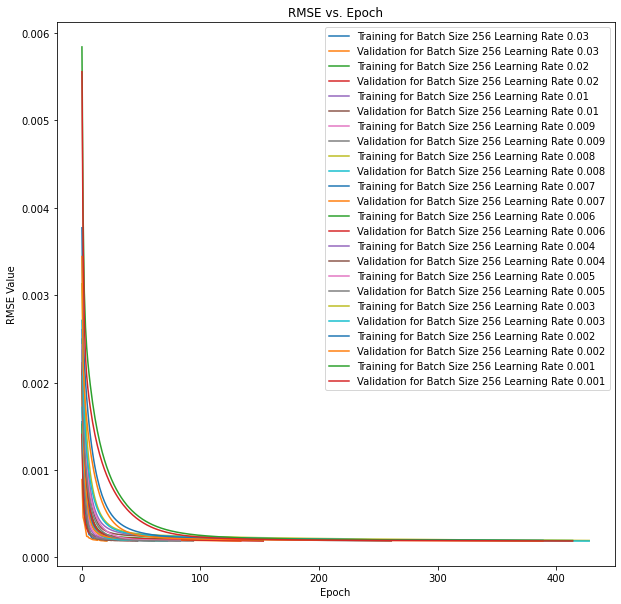

In [32]:
# Plot for training and validation RMSE vs. epoch
plt.figure(figsize=(10,10))
for i in range(len(best_lr_final)):
  plt.plot(RMSE_train_final[i], label='Training for Batch Size {} Learning Rate {}'.format(best_batchsize, best_lr_final[i]), linestyle='solid')
  plt.plot(RMSE_val_final[i], label='Validation for Batch Size {} Learning Rate {}'.format(best_batchsize, best_lr_final[i]), linestyle='solid')
plt.xlabel('Epoch') 
plt.ylabel('RMSE Value')
plt.title('RMSE vs. Epoch')
plt.legend()
plt.show()

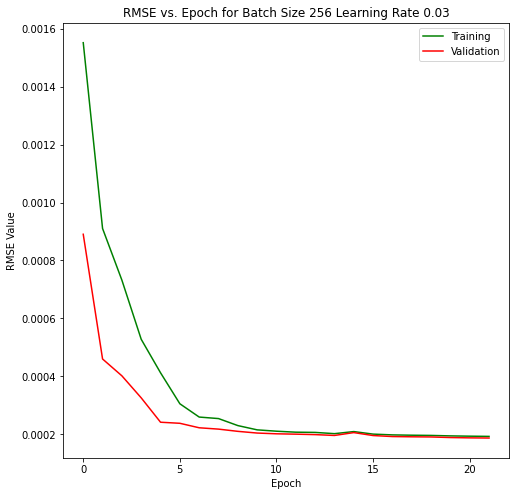

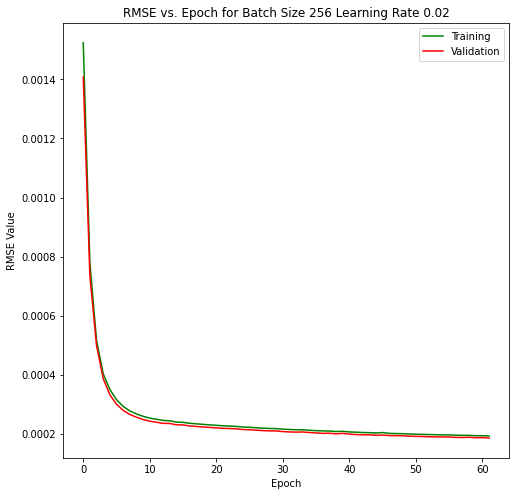

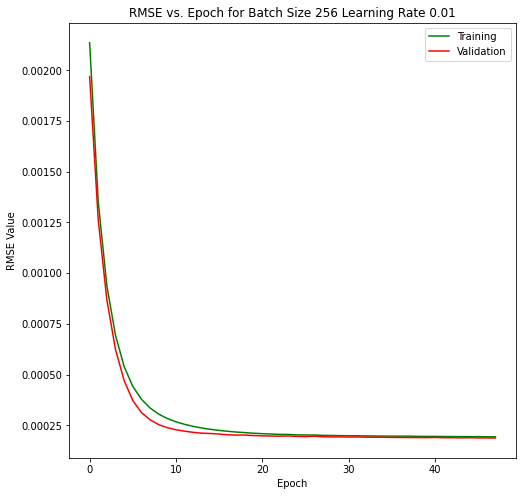

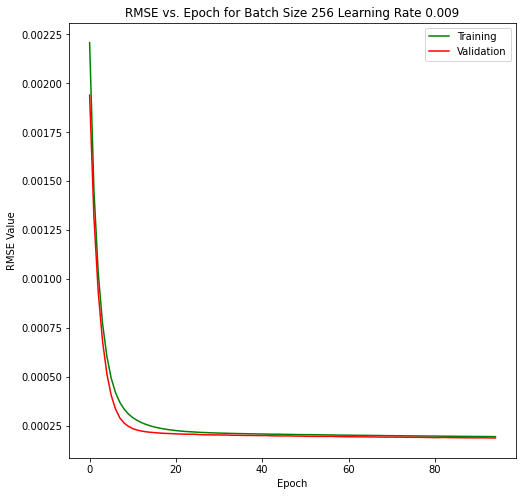

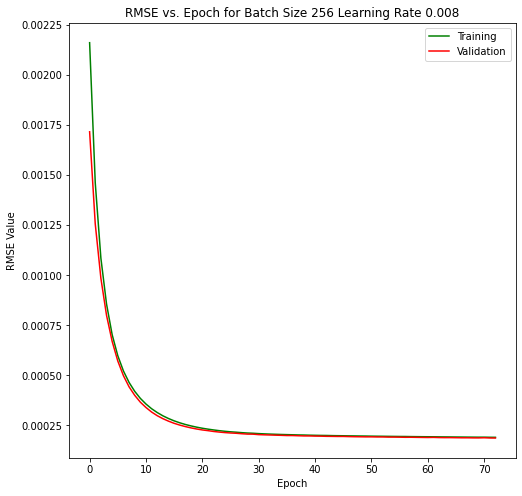

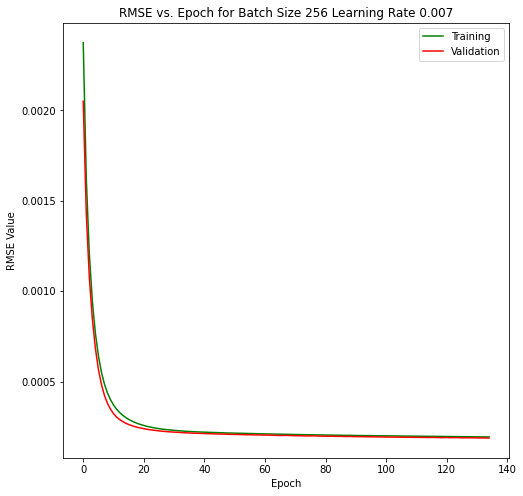

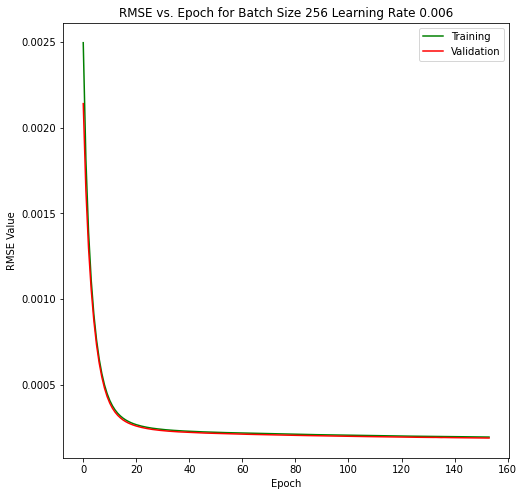

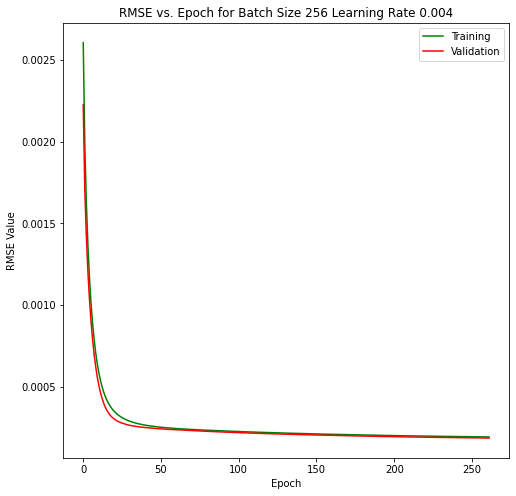

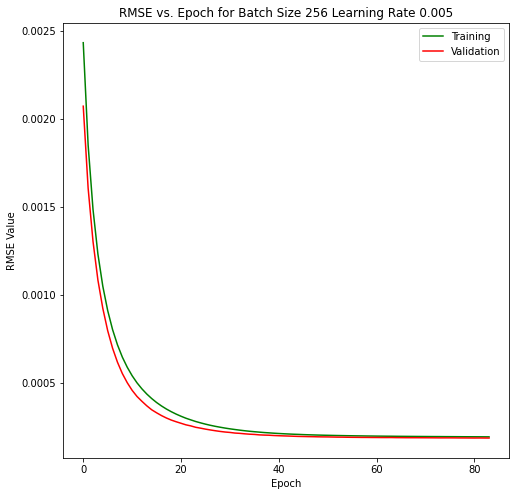

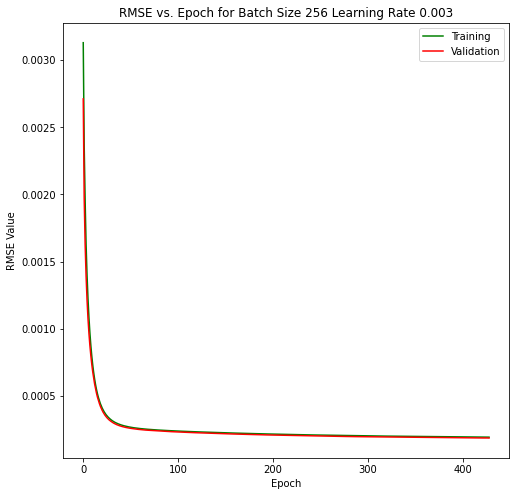

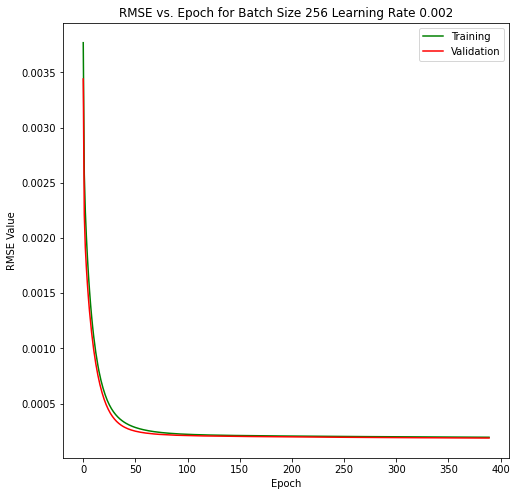

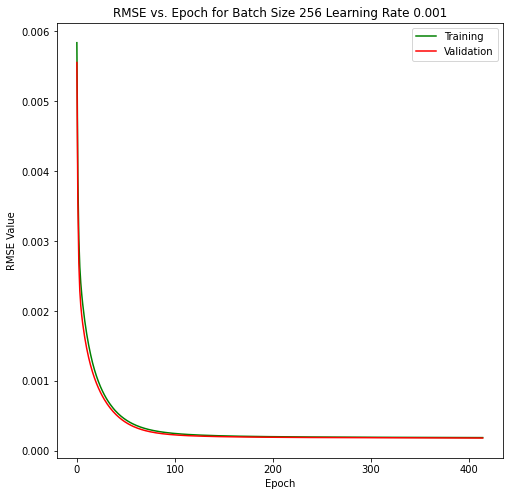

In [33]:
# Plot for training and validation RMSE vs. epoch in seperate figure for better understanding
for i in range(len(best_lr_final)):
  plt.figure(figsize=(8,8))
  plt.plot(RMSE_train_final[i], label='Training', color='green', linestyle='solid')
  plt.plot(RMSE_val_final[i], label='Validation', color='Red', linestyle='solid')
  plt.xlabel('Epoch') 
  plt.ylabel('RMSE Value')
  plt.title('RMSE vs. Epoch for Batch Size {} Learning Rate {}'.format(best_batchsize, best_lr_final[i]))
  plt.legend()
  plt.show()

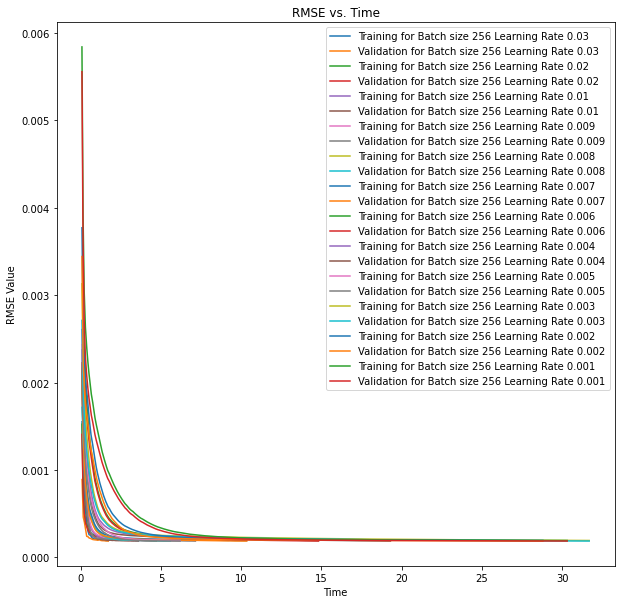

In [34]:
# Plot for training and validation RMSE vs. time
plt.figure(figsize=(10,10))
for i in range(len(best_lr_final)):
  plt.plot(time_final[i], RMSE_train_final[i], label='Training for Batch size {} Learning Rate {}'.format(best_batchsize, best_lr_final[i]), linestyle='solid')
  plt.plot(time_final[i], RMSE_val_final[i], label='Validation for Batch size {} Learning Rate {}'.format(best_batchsize, best_lr_final[i]), linestyle='solid')
plt.xlabel('Time') 
plt.ylabel('RMSE Value')
plt.title('RMSE vs. Time')
plt.legend()
plt.show()

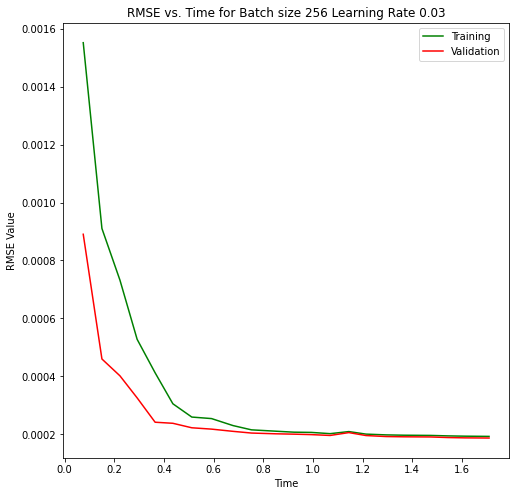

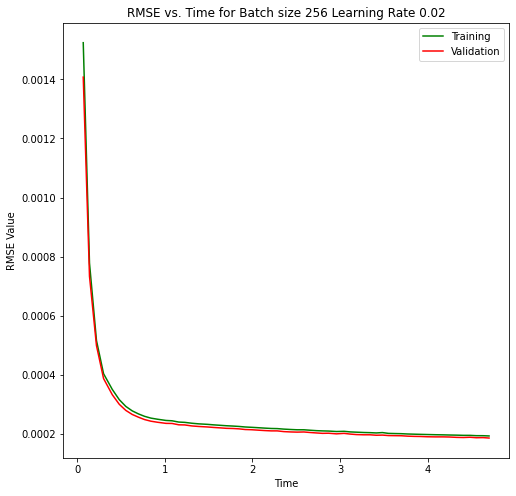

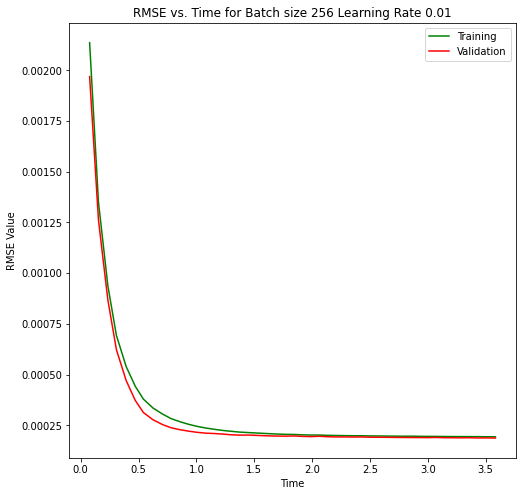

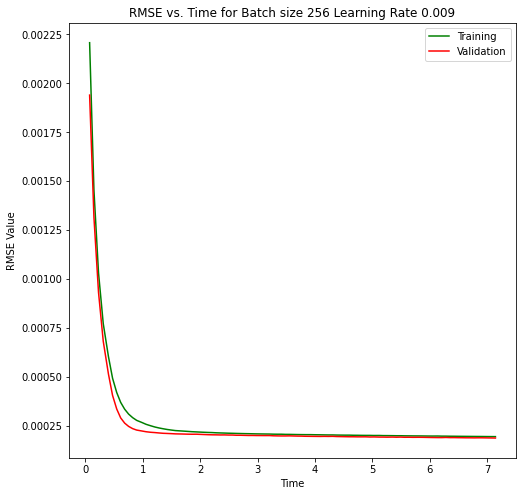

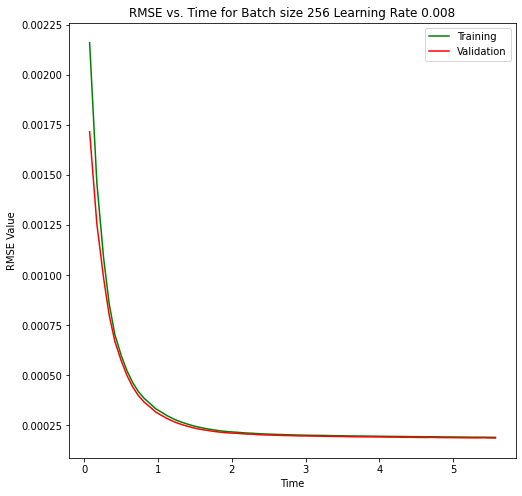

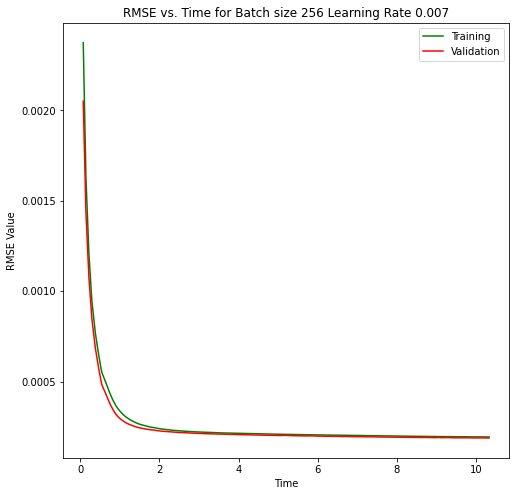

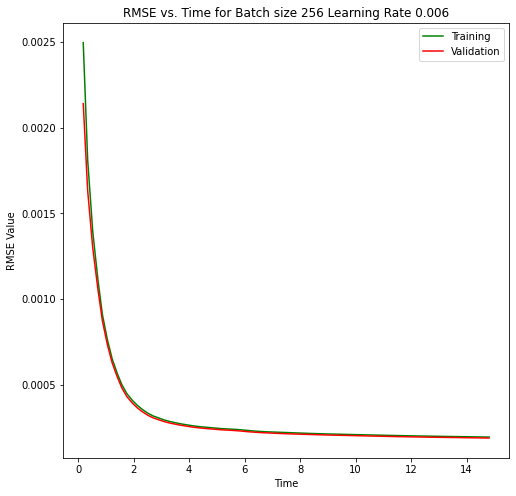

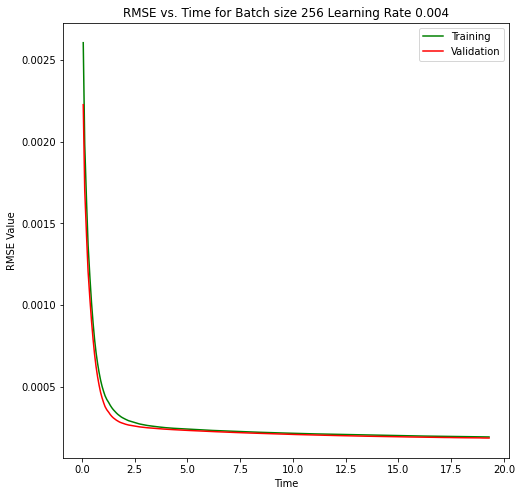

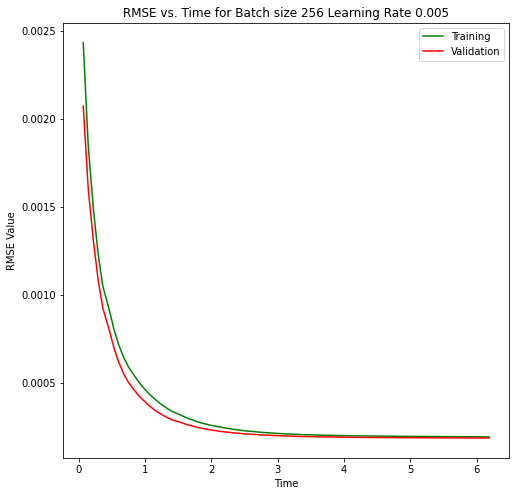

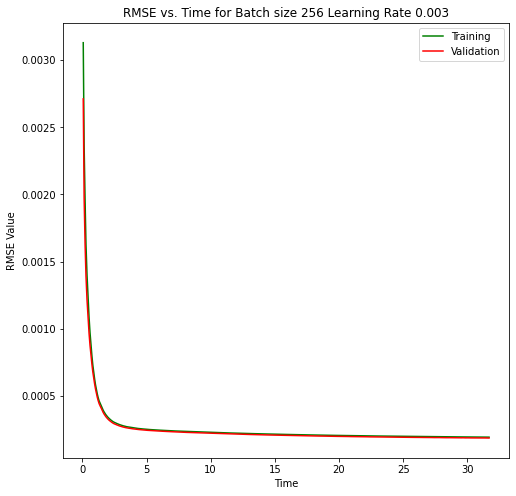

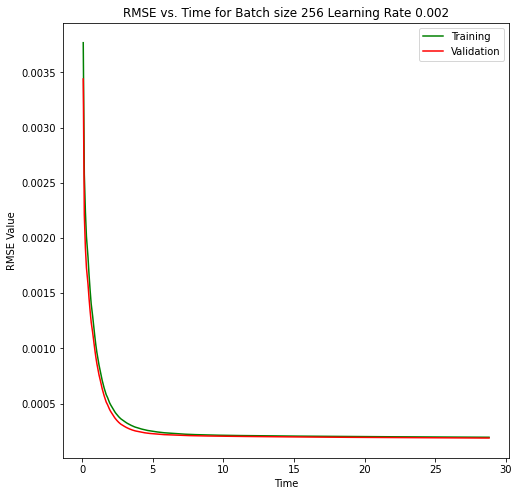

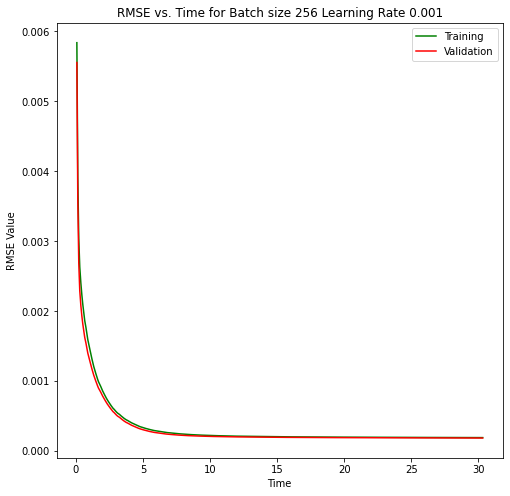

In [35]:
# Plot for training and validation RMSE vs. time in seperate figure for better understanding
for i in range(len(best_lr_final)):
  plt.figure(figsize=(8,8))
  plt.plot(time_final[i], RMSE_train_final[i], label='Training', color='green', linestyle='solid')
  plt.plot(time_final[i], RMSE_val_final[i], label='Validation', color='Red', linestyle='solid')
  plt.xlabel('Time') 
  plt.ylabel('RMSE Value')
  plt.title('RMSE vs. Time for Batch size {} Learning Rate {}'.format(best_batchsize, best_lr_final[i]))
  plt.legend()
  plt.show()

In [36]:
# Finding Best validation RMSE
arr = []
for i in range(len(best_lr_final)):
  a = min(RMSE_val_final[i])
  arr.append(a)
  print(i, "-", min(RMSE_val_final[i]))
print("minimum:", arr.index(min(arr)),"-", min(arr))
print(best_lr_final)
print("minimum lr:", best_lr_final[arr.index(min(arr))], "for batch size", best_batchsize)

0 - 0.00018728987748231523
1 - 0.00018690522984126358
2 - 0.00018715947241213093
3 - 0.00018718155659468055
4 - 0.0001873993447009443
5 - 0.00018722331456126888
6 - 0.0001874547593318097
7 - 0.00018751073083493036
8 - 0.00018744118514853815
9 - 0.00018740076680510376
10 - 0.00018751088637464645
11 - 0.00018749640068142133
minimum: 1 - 0.00018690522984126358
[0.03, 0.02, 0.01, 0.009, 0.008, 0.007, 0.006, 0.004, 0.005, 0.003, 0.002, 0.001]
minimum lr: 0.02 for batch size 256


**Answer 5.2.3:** 
Based on question 1, Smaller batch sizes requires smaller learning rate for converging. When the batch size increases, the learning rate required for converging increases comparitively and it takes less time to converge. 

From part 4 based on Total training time vs. Batch size, batch size 256 is considered as it takes less time to converge compared to all other batch sizes.

1). Based on RMSE vs. epoch plot for training and validation, when the learning rate is high it takes less number of epochs for converging and the variance is high. When learning rate is decreases, it takes large number of epochs for converging and the variance is low. 

2). Based on RMSE vs. time plot for training and validation, as the learning rate decreases it takes more time for converging. However, the graph is similar to RMSE vs. epoch.

## Part 6 - Finalizing a model [1 marks]
Based on your findings from the previous parts, pick a model (or combination of model settings) that you think would work best for our dataset and evaluate it on the test set. 

Briefly describe your model selections/settings. **[0.5]** 

Summarize the performance of your model for the task of managing ailerons of an aircraft. **[0.5]** 

In [37]:
best_batch_final = 256
best_final_lr = 0.02

w_f, RMSE_train_f, RMSE_val_f, time_f = mini_batch_GD(df_X_train_std, y_train_df, df_X_val_std, y_val_df, best_batch_final, best_final_lr, CT)

y_pred_test = np.dot(df_X_test_std, w_f.T)
RMSE_test = RMSE(y_pred_test, y_test)

print("RMSE test value:", RMSE_test)

RMSE test value: 0.0001828118669024149


**Answer 6.1:** Mini-Batch gradient is chosen for testing as it performs better than other models. Batch size of 256 and learning rate of 0.02 is selected as it converges faster and has minimum validation accuracy for the particular learning rate.

**Answer 6.2:** The selected model has faster training time and converges quickly with minimum RMSE. The RMSE for the test data of the selected model is 0.0001828 which is a good fit. Therefore, the selected model is good for the task of managing ailerons of an aircraft.

## Part 7 - Getting started with GitHub  [3 marks]

This final part of the project assignment is to be completed independently from Parts 1 - 6. In this part you will be completing some additional coding tasks using a different dataset and submitting your results on Github. To access this part of the assignment and upload your answers, you will need to use Github. Please complete the following step-by-step instructions:

 0. Create a Github account and install git for Windows or Mac: 
  * https://git-scm.com/download/win
  * https://git-scm.com/download/mac

 1. Open this link: https://classroom.github.com/a/ZC8Petsq to create your assignment repository in GitHub. You should get a link similar to:
```
https://github.com/APS-1070-2021/f22-project4-git-*********
```
This your private repository to get this part questions and upload your answers. **Copy this link to the text box below to be graded for this part.**

 
 2. Open `Git Bash`, the app you downloaded in step `0`, and set your Email and username by:
```
git config --global user.email “<your-GitHub-email>”
git config --global user.name “<your-GitHub-username>”
```

 3. Create a folder for the course on your computer and `cd` to that. `cd` means `Change Directory`. For example, on a Windows machine, where I have a folder on "C:\aps1070":
 ```
cd c:aps1070
```
 4. Get your assignment by the link you got in step 1:
```
git clone https://github.com/APS-1070-2021/f22-project4-git-*********
```
If this is the first time you are using Git Bash, it will ask you to sign in on GitHub via your browser. 

 5. A new folder should be created in your directory similar to:
```
C:\aps1070\f22-project4-git-********
```
This folder has an `ipynb` notebook which you need to manually upload to colab and answer its questions. 

 6. After you finished working on this notebook, download the notebook from colab and move it to the directory in step 5.

 7. Replace the old notebook with the new one that has your answers. Make sure your completed notebook has the same name as the original notebook you downloaded. 

 8. To submit your work, follow: 
```
cd <your assignment folder>
git add F22_Project_4_git.ipynb
git commit -m “Final Submission”
git push 
```
If you had any problem with pushing your work on GitHub you can try one of following commands:
```
git push --force
or 
git push origin HEAD:main
```

 9. Make sure your submission is ready for grading. Open the private repository link in your browser and make sure you can see your final submission with your latest changes there. **Only you and the teaching team can open that link.** 

**Private Repository Link : <font color='red'>** **https://github.com/APS-1070-2021/f22-project4-git-Anbumanivel**</font>